# **I. Import all the necessary libraries**

In [1]:
from utils import *
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# **II. Import and Preprocess the dataset**

In [2]:
data = pd.read_csv('Student_Performance.csv')


In [3]:
train, test = train_test_split(data)


In [4]:
x_test = test[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_test = test['Performance Index']


In [5]:
x_train = train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_train = train['Performance Index']


In [6]:
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Columns to normalize: All except for extracurricular activities

In [7]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


In [8]:
x_meta = [x_test,x_train]


In [9]:
x_meta = [x_test,x_train]
y_meta = [y_test,y_train]
for i in features:
    for j in x_meta:
        if i == 'Extracurricular Activities':
            dict_map = {
                'Yes' : 1,
                'No' : 0,
            }
            j['Extracurricular Activities'] = j['Extracurricular Activities'].map(dict_map)
        else:
            j[i] = z_score_normalize(j[i])
del x_meta,y_meta


/var/folders/36/khn_y8zn7qqflczfpst8cbfc0000gn/T/ipykernel_3848/1995739649.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j[i] = z_score_normalize(j[i])
/var/folders/36/khn_y8zn7qqflczfpst8cbfc0000gn/T/ipykernel_3848/1995739649.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j[i] = z_score_normalize(j[i])
/var/folders/36/khn_y8zn7qqflczfpst8cbfc0000gn/T/ipykernel_3848/1995739649.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [10]:
x_train


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8700,0.875,0.406780,1,0.6,0.444444
6833,0.500,0.067797,1,0.6,0.555556
6713,1.000,0.796610,1,0.6,0.222222
7161,0.375,0.542373,0,0.2,0.333333
6907,0.500,0.271186,1,1.0,0.666667
...,...,...,...,...,...
7990,0.500,0.898305,1,0.4,0.555556
5563,0.875,0.203390,0,0.4,0.000000
276,0.250,0.237288,0,0.8,0.777778
6872,0.125,0.033898,1,0.4,0.000000


In [11]:
y_train


8700    58.0
6833    27.0
6713    85.0
7161    56.0
6907    46.0
        ... 
7990    80.0
5563    43.0
276     35.0
6872    17.0
2248    48.0
Name: Performance Index, Length: 7500, dtype: float64

# **III. Train the model**

In [12]:
model = LinearRegression()


In [13]:
model.batch_gradient_descent_train(x_train,y_train,epochs=1000)


(1, 5) [[-443335.65497888 -482875.01310323 -409235.36487639 -418586.03102112
  -418304.65709153]]
Training MSE Loss:  [ 9252300.09928978  1470000.86295494 21702356.47468669 ...
  3118492.97583986   521355.20893311  5867897.59481394]
(1, 5) [[-395378.13706152 -435481.06006074 -358301.67709946 -370027.67997838
  -369875.35973864]]
Training MSE Loss:  [ 6983056.46054809   766735.77054854 17857477.19633475 ...
  2204514.59167392   243683.29574304  4070856.87819131]
(1, 5) [[-352764.15647886 -393343.87608379 -313130.29239743 -326899.96931981
  -326861.66161688]]
Training MSE Loss:  [ 5237417.89733524   333848.05733133 14755087.43162531 ...
  1525442.79460905    85245.76818582  2752572.90192003]
(1, 5) [[-314896.51827711 -355876.06380369 -273076.07571556 -288595.86203528
  -288658.19249881]]
Training MSE Loss:  [ 3899354.60717968    98943.03653375 12246232.20463235 ...
  1026963.12477233    13001.64425687  1799773.00412688]
(1, 5) [[-281244.79215385 -322555.89495648 -237566.03126211 -254576.

In [14]:
print(model.w,model.b)


[[22.32777943]
 [59.18586808]
 [ 0.44239485]
 [ 1.97466326]
 [ 1.31309032]] 12.72822651396759


In [15]:
print(model.predict(x_test.iloc[0].to_numpy()),y_test.iloc[0])


[[84.09927678]] 82.0


In [16]:
prediction = []
for i in range(x_test.shape[0]):
    prediction.append(model.predict(x_test.iloc[i].to_numpy()))


In [17]:
calculate_mae(prediction,y_test)


1.6154537342529274

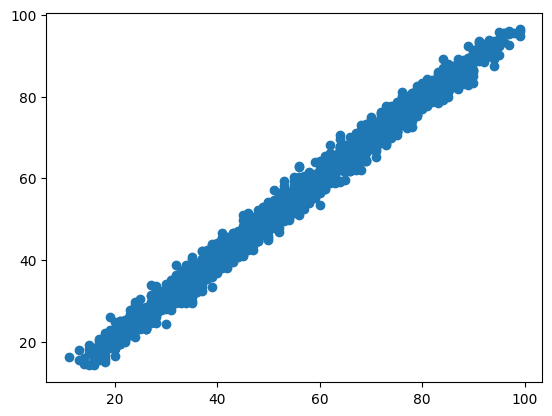

In [18]:
plt.scatter(y_test,prediction)
